# <center> STOCK PREDICTION USING DEEP LEARNING </center>

## <center> ABOUT THE DATA </center>

### We have five datasets consisting of the stock prices of five companies (Facebook, Amazon, Apple, Netflix and Google) from 2012 till March 2021.

### The datasets have 6 columns - Date, Open, High, Low, Close, Adj Close and Volume

 - Date      : Trading date of the stock
 - Open      : Stock’s opening price 
 - High      : Highest stock price on a particular trading day
 - Low       : Lowest stock price on a particular trading day
 - Close     : Stock's closing price
 - Adj Close : Ending or closing price of the stock which was changed to contain any corporations’ actions and distribution that is occurred during trade time of the day
 - Volume    : Number of stocks traded on a particular day.
 

### IMPORTING LIBRARIES

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score
from tensorflow.keras import datasets, layers,models
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation,SimpleRNN
import tensorflow as tf
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from pykalman import KalmanFilter
import PySimpleGUI as sg
import plotly.graph_objects as go
from datetime import datetime
tf.random.set_seed(7)

### READING AND ANALYSING THE DATA

In [47]:
# To plot the Kalman filtered price fluctuation
def price_fluct(company):
    
        kf = KalmanFilter(transition_matrices = [1], observation_matrices = [1], initial_state_mean = 0, 
                         initial_state_covariance = 1, observation_covariance = 1,transition_covariance = 0.0001)
        mean, cov = kf.filter(company['Adj Close'].values)
        mean, std = mean.squeeze(), np.std(cov.squeeze())
        plt.figure(figsize=(12,6))
        plt.plot(Facebook['Adj Close'].values - mean, 'red', lw=1.5)
        plt.xticks(range(0,company.shape[0],500),company['Date'].loc[::500],rotation=45)
        plt.title("Kalman filtered price fluctuation")
        plt.ylabel("Deviation from the mean ($)")
        plt.xlabel("Days")

# Interactive candlestick visualization of the company's stock data 
def candlestick_viz(company):
    
    fig = go.Figure(data=[go.Candlestick(x=Facebook['Date'],open=Facebook['Open'],high=Facebook['High'],
                low=Facebook['Low'], close=Facebook['Close'])])

    fig.show()
    

In [48]:
Facebook = pd.read_csv('Facebook.csv')
Facebook

,Date,Open,High,Low,Close,Adj Close,Volume
0,5/18/2012,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,5/21/2012,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,5/22/2012,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,5/23/2012,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,5/24/2012,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2222,3/19/2021,281.220001,292.799988,281.200012,290.109985,290.109985,38905100
2223,3/22/2021,290.450012,299.709992,286.750000,293.540008,293.540008,28273100
2224,3/23/2021,293.149994,298.000000,289.809998,290.630005,290.630005,23000900
2225,3/24/2021,291.000000,291.720001,281.160004,282.140015,282.140015,18675000


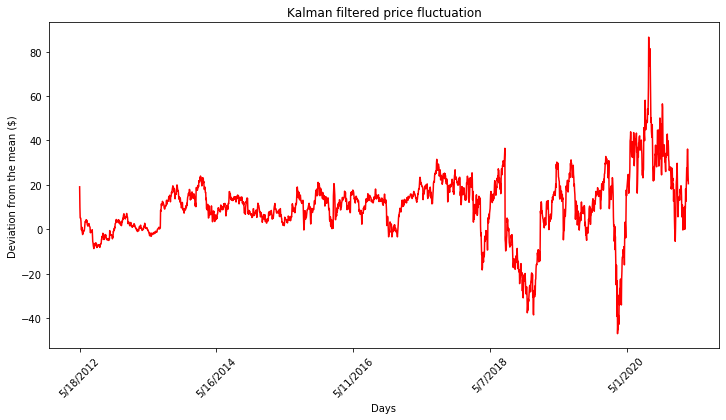

In [49]:
price_fluct(Facebook)

In [50]:
candlestick_viz(Facebook)

In [51]:
Amazon = pd.read_csv('Amazon.csv')
Amazon

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,219.410004,219.630005,212.809998,213.850006,213.850006,5231700
1,2012-05-21,214.029999,219.979996,212.820007,218.110001,218.110001,3579800
2,2012-05-22,218.309998,218.869995,213.960007,215.330002,215.330002,3733100
3,2012-05-23,214.710007,217.550003,211.179993,217.279999,217.279999,4243800
4,2012-05-24,216.979996,217.660004,212.699997,215.240005,215.240005,3141100
...,...,...,...,...,...,...,...
2222,2021-03-19,3029.229980,3077.290039,3016.629883,3074.959961,3074.959961,4616400
2223,2021-03-22,3067.850098,3126.580078,3060.050049,3110.870117,3110.870117,2902200
2224,2021-03-23,3127.000000,3182.000000,3120.850098,3137.500000,3137.500000,3817300
2225,2021-03-24,3151.040039,3160.310059,3085.149902,3087.070068,3087.070068,2959000


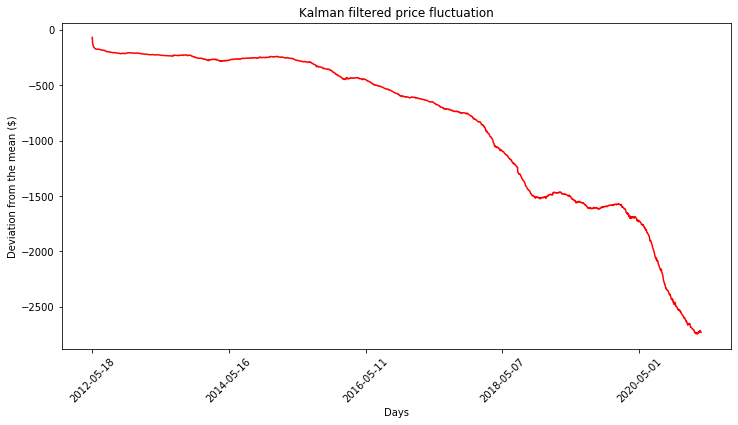

In [52]:
price_fluct(Amazon)

In [53]:
candlestick_viz(Amazon)

In [54]:
Apple = pd.read_csv('Apple.csv')
Apple

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,19.070000,19.407499,18.649286,18.942142,16.288403,732292400
1,2012-05-21,19.089287,20.055000,19.073214,20.045713,17.237370,631106000
2,2012-05-22,20.341070,20.495714,19.735001,19.891787,17.105009,694870400
3,2012-05-23,19.910713,20.457144,19.758215,20.377144,17.522364,584897600
4,2012-05-24,20.566786,20.589287,20.043928,20.190001,17.361441,496230000
...,...,...,...,...,...,...,...
2222,2021-03-19,119.900002,121.430000,119.680000,119.989998,119.786530,185549500
2223,2021-03-22,120.330002,123.870003,120.260002,123.389999,123.180771,111912300
2224,2021-03-23,123.330002,124.239998,122.139999,122.540001,122.332214,95467100
2225,2021-03-24,122.820000,122.900002,120.070000,120.089996,119.886360,88530500


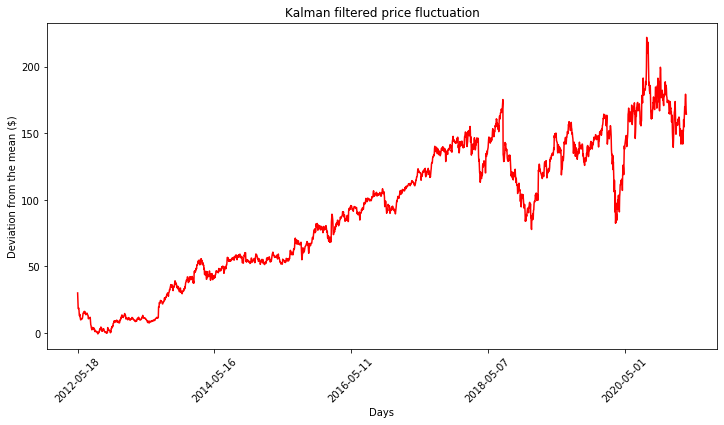

In [55]:
price_fluct(Apple)

In [56]:
candlestick_viz(Apple)

In [57]:
Netflix = pd.read_csv('Netflix.csv')
Netflix

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,10.328571,10.392857,9.337143,9.994286,9.994286,29415400
1,2012-05-21,9.978571,10.312857,9.650000,10.248571,10.248571,25143300
2,2012-05-22,10.257143,10.342857,9.607143,9.672857,9.672857,40014800
3,2012-05-23,9.638571,10.307143,9.595714,10.272857,10.272857,44100000
4,2012-05-24,10.217143,10.241429,9.928571,10.038571,10.038571,20742400
...,...,...,...,...,...,...,...
2222,2021-03-19,504.959991,513.190002,501.630005,512.179993,512.179993,4386400
2223,2021-03-22,509.130005,529.309998,509.130005,523.109985,523.109985,3360600
2224,2021-03-23,529.869995,543.119995,529.400024,535.090027,535.090027,5583500
2225,2021-03-24,533.780029,534.419983,520.000000,520.809998,520.809998,4102200


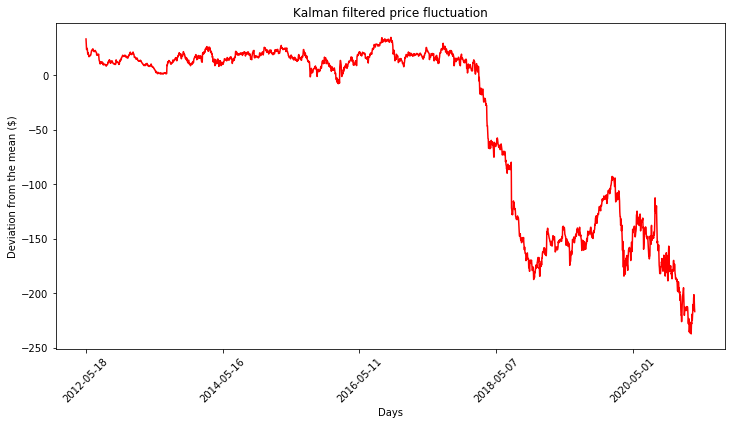

In [58]:
price_fluct(Netflix)

In [59]:
candlestick_viz(Netflix)

In [60]:
Google = pd.read_csv('Google.csv')
Google

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,311.382874,315.029205,297.235901,299.078979,299.078979,11991780
1,2012-05-21,299.133759,306.695435,298.879730,305.908386,305.908386,6173855
2,2012-05-22,305.574646,305.758942,296.887207,299.278229,299.278229,6126679
3,2012-05-23,299.701660,303.661804,297.445099,303.592072,303.592072,6380025
4,2012-05-24,303.442627,304.817474,298.316833,300.702881,300.702881,3796778
...,...,...,...,...,...,...,...
2222,2021-03-19,2042.050049,2053.100098,2017.680054,2043.199951,2043.199951,2314900
2223,2021-03-22,2041.839966,2057.989990,2026.069946,2038.589966,2038.589966,1954800
2224,2021-03-23,2051.699951,2072.302002,2039.219971,2052.959961,2052.959961,1367000
2225,2021-03-24,2065.370117,2078.209961,2041.555054,2045.060059,2045.060059,1154000


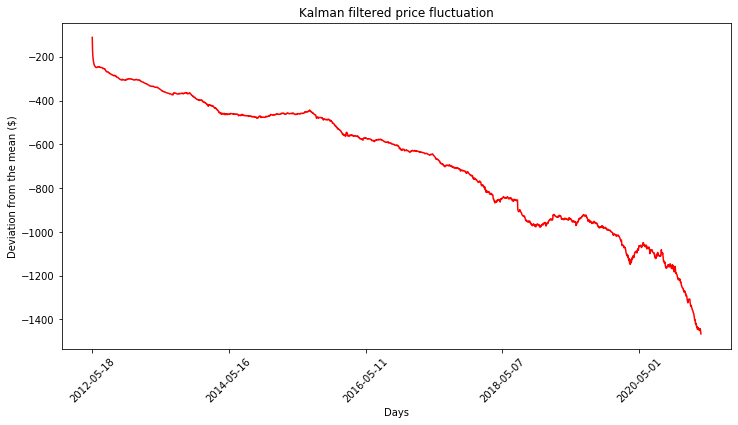

In [61]:
price_fluct(Google)

In [62]:
candlestick_viz(Google)

Text(0, 0.5, 'Closing Price')

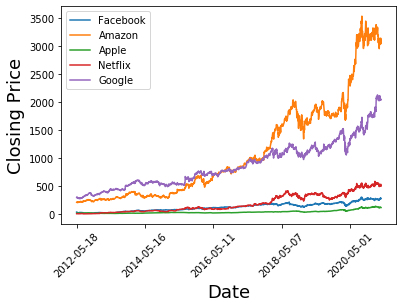

In [63]:
# Plotting the raw closing prices of all the companies from 2012 till March 2021
plt.plot(range(Facebook.shape[0]),(Facebook['Close']))
plt.plot(range(Amazon.shape[0]),(Amazon['Close']))
plt.plot(range(Apple.shape[0]),(Apple['Close']))
plt.plot(range(Netflix.shape[0]),(Netflix['Close']))
plt.plot(range(Google.shape[0]),(Google['Close']))

plt.xticks(range(0,Apple.shape[0],500),Apple['Date'].loc[::500],rotation=45)

plt.legend(["Facebook","Amazon","Apple","Netflix","Google"])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing Price',fontsize=18)

### DEEP LEARNING MODELS

### TRAINING AND TESTING THE MODEL

In [64]:
class stock_predict_DL:
    
    def __init__(self,comp_df):
        # reseved method in python classes (Constructor)
        # We are taking only the Open prices for predicting 
        data = comp_df.filter(['Open'])
        dataset = data.values
        # We take 90% of the data for training and 10% for testing 
        training_data_len = int(np.ceil( len(dataset) * 0.90 ))
        # We are scaling the open prices to the range(0,1)
        self.scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = self.scaler.fit_transform(dataset)
        # Taking the first 90% of the dataset for training 
        train_data = scaled_data[0:int(training_data_len), :]
        # Split the data into self.X_train and self.y_train data sets
        self.X_train = []
        self.y_train = []
        
        # We are taking predicting the open price of a given day based on the trend in the previous 60 days
        for i in range(60, len(train_data)):
            self.X_train.append(train_data[i-60:i, 0])
            self.y_train.append(train_data[i, 0])

        # Convert the self.X_train and self.y_train to numpy arrays 
        self.X_train, self.y_train = np.array(self.X_train), np.array(self.y_train)

        # Create the testing data set
        # Create a new array containing scaled values from index 1543 to 2002 
        test_data = scaled_data[training_data_len - 60: , :]
        # Create the data sets self.X_test and self.y_test
        self.X_test = []
        # Rmaining 10% of the data needs to be given for testing 
        self.y_test = dataset[training_data_len:, :]
        for i in range(60, len(test_data)):
            self.X_test.append(test_data[i-60:i, 0])

        # Convert the data to a numpy array
        self.X_test = np.array(self.X_test)
        test_dates = comp_df['Date'].values
        self.testd = test_dates[training_data_len:] # stores the test dates
        # List to store the R2 scores of all the models to get the best model at the end
        self.model_score = []
        
    def LSTM_model(self):
        
        print("Long Short-Term Memory (LSTM)")
        # Reshape the data
        Xtrain = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1))
        # Reshape the data
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        # Build the LSTM model
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, input_shape= (Xtrain.shape[1], 1)))
        model.add(Dropout(0.2))
        model.add(LSTM(50, return_sequences=False))
        model.add(Dropout(0.2))
        model.add(Dense(32))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        # We are adding dropout to reduce overfitting 
        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')
        # Train the model
        model.fit(Xtrain, self.y_train, batch_size=1, epochs= 1)
         # Get the models predicted price values 
        predictions = model.predict(Xtest)
        # We need to inverse transform the scaled data to compare it with our unscaled y_test data
        predictions = self.scaler.inverse_transform(predictions)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, predictions))
        self.model_score.append(["LSTM",metrics.r2_score(self.y_test, predictions)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, predictions))
        plt.plot(predictions)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("LSTM")
        
    def autoen_model(self):
        
        print("Autoencoder")
        # No of encoding dimensions
        encoding_dim = 32
        input_dim = self.X_train.shape[1]
        input_layer = Input(shape=(input_dim, ))
        # Encoder
        encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(1e-5))(input_layer)
        encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
        # Decoder
        decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
        decoder = Dense(1, activation='relu')(decoder)
        autoencoder = Model(inputs=input_layer, outputs=decoder)
        nb_epoch = 10
        b_size = 32
        # Fitting and compiling the train data using adam (stochastic gradient) optimiser and mse loss
        autoencoder.compile(optimizer='adam',loss='mean_squared_error')
        autoencoder.fit(self.X_train, self.y_train,epochs=nb_epoch,batch_size = b_size,shuffle=True)
        predictions = autoencoder.predict(self.X_test)
        predictions = self.scaler.inverse_transform(predictions)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, predictions))
        self.model_score.append(["Autoencoder",metrics.r2_score(self.y_test, predictions)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, predictions))
        plt.plot(predictions)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("AUTOENCODER")
        
    def Mlp_model(self):
        
        print("Multilayer perceptron (MLP)")
        # We are using MLPRegressor as the problem at hand is a regression problem
        regr = MLPRegressor(hidden_layer_sizes = 100, alpha = 0.01,solver = 'lbfgs',shuffle=True)
        regr.fit(self.X_train, self.y_train)
        # predicting the price
        y_pred = regr.predict(self.X_test)
        y_pred = y_pred.reshape(len(y_pred),1)
        y_pred = self.scaler.inverse_transform(y_pred)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, y_pred))
        # Appending the model score and printing the mean squared log error
        self.model_score.append(["MLP",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("MLP")
        
    def basic_ann_model(self):
        
        print("Basic Artificial Neural Network (ANN)")
        classifier = Sequential()
        classifier.add(Dense(units = 128, activation = 'relu', input_dim = self.X_train.shape[1]))
        classifier.add(Dropout(0.2))
        classifier.add(Dense(units = 64))
        classifier.add(Dropout(0.2))
        classifier.add(Dense(units = 1))
        # We are adding dropout to reduce overfitting
        # adam is one of the best optimzier for DL as it uses stochastic gradient method
        # Mean Square Error (MSE) is the most commonly used regression loss function.
        # MSE is the sum of squared distances between our target variable and predicted values.
        classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')
        classifier.fit(self.X_train, self.y_train, batch_size = 32, epochs = 10)
        # Predicting the prices
        prediction = classifier.predict(self.X_test)
        y_pred = self.scaler.inverse_transform(prediction)
        print("R2 SCORE")
        print(metrics.r2_score(self.y_test, y_pred))
        # Appending the R2 score
        self.model_score.append(["ANN",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("ANN")
    
    def rnn_model(self):
        
        print("Recurrent neural network (RNN)")
        # Reshape the data
        Xtrain = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1))
        # Reshape the data
        Xtest = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1 ))
        model = Sequential()
        model.add(SimpleRNN(units=4, input_shape=(Xtrain.shape[1], Xtrain.shape[2])))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(Xtrain, self.y_train, epochs=10, batch_size=1)
        # predicting the opening prices
        prediction = model.predict(Xtest)
        y_pred = self.scaler.inverse_transform(prediction)
        print("R2 SCORE")
        # Appending the R2 score
        print(metrics.r2_score(self.y_test, y_pred))
        self.model_score.append(["RNN",metrics.r2_score(self.y_test, y_pred)])
        print("MSLE")
        print(metrics.mean_squared_log_error(self.y_test, y_pred))
        plt.plot(y_pred)
        plt.plot(self.y_test)
        plt.legend(["Predicted","Observed"])
        plt.xticks(range(0,len(self.y_test),50),self.testd,rotation=45)
        plt.xlabel('Date',fontsize=18)
        plt.ylabel('Price',fontsize=18)
        plt.title("RNN")
        
    def best_model(self):
        #function to find the best model based on the accuracies of the models trained
        print(self.model_score)
        Dict = {item[0]: item[1:][0] for item in self.model_score}
        keys = list(Dict.keys()) # creating a list of Dict keys
        vals = list(Dict.values()) # creating a list of Dict values
        print("The best model is ",keys[vals.index(max(vals))]) # getting the model with the highest accuracy
        print("Accuracy of ",keys[vals.index(max(vals))],'is',max(vals)) #getting the accuracy of the best model
      

## Choosing the data and Calling the model

In [65]:
# GUI
# builds a window where we can browse for our data file
sg.theme("DarkTeal2")
layout = [[sg.T("")], [sg.Text("Choose a file (.csv): "), sg.Input(), sg.FileBrowse(key="-IN-")],[sg.Button("Select")]]

#Building Window
window = sg.Window('Stock Dataset Browser', layout, size=(600,150))
# If user presses select buttom then store the file path
# After selecting it, it closes the pop-up
while True:
    event, values = window.read()
    if event == sg.WIN_CLOSED or event=="Exit":
        break
    elif event == "Select":
        print(values["-IN-"])
        filepath = values["-IN-"]
        window.close()

C:/Users/deept/Desktop/Sem 4/Sem4 Projects/MIS4 Project/Google.csv


In [66]:
folder = 'C:/Users/deept/Desktop/Sem 4/Sem4 Projects/MIS4 Project/'
# reading the csv file that was selected and printing the file name 
data = pd.read_csv(filepath)
comp_name = filepath.replace(folder,"")
comp_name = comp_name.replace('.csv',"")
print("Company " + comp_name + "'s stocks chosen")

Company Google's stocks chosen


In [67]:
# creating an object company_stock for the class stock_predict_DL
company_stock = stock_predict_DL(data)

Long Short-Term Memory (LSTM)
1945/1945 [==============================] - 29s 14ms/step - loss: 0.0042
R2 SCORE
0.9274248049855155
MSLE
0.001156289294091965


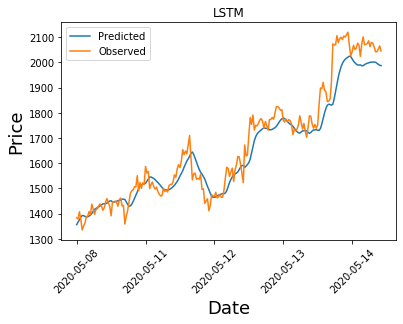

In [68]:
company_stock.LSTM_model()

Autoencoder
Epoch 1/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0975
Epoch 2/10
61/61 [==============================] - 0s 981us/step - loss: 0.0016
Epoch 3/10
61/61 [==============================] - 0s 864us/step - loss: 2.8041e-04
Epoch 4/10
61/61 [==============================] - 0s 931us/step - loss: 2.7310e-04
Epoch 5/10
61/61 [==============================] - 0s 748us/step - loss: 2.2354e-04
Epoch 6/10
61/61 [==============================] - 0s 814us/step - loss: 1.9700e-04
Epoch 7/10
61/61 [==============================] - 0s 798us/step - loss: 2.2213e-04
Epoch 8/10
61/61 [==============================] - 0s 741us/step - loss: 1.9632e-04
Epoch 9/10
61/61 [==============================] - 0s 748us/step - loss: 1.9208e-04
Epoch 10/10
61/61 [==============================] - 0s 778us/step - loss: 1.9800e-04
R2 SCORE
0.8294797373003213
MSLE
0.0028447863628638472


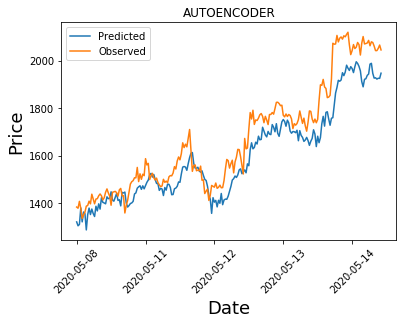

In [69]:
company_stock.autoen_model()

Multilayer perceptron (MLP)
R2 SCORE
0.953083812871098
MSLE
0.0008419036599641782


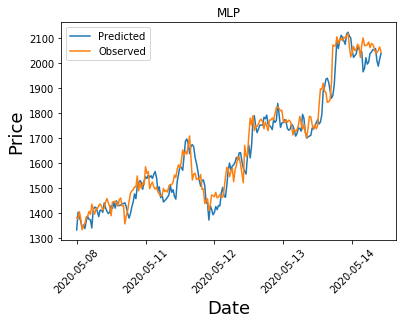

In [70]:
company_stock.Mlp_model()

Basic Artificial Neural Network (ANN)
Epoch 1/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 2/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 3/10
61/61 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 4/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 5/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 6/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 7/10
61/61 [==============================] - 0s 820us/step - loss: 0.0018
Epoch 8/10
61/61 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 9/10
61/61 [==============================] - 0s 983us/step - loss: 0.0015
Epoch 10/10
61/61 [==============================] - 0s 968us/step - loss: 0.0015
R2 SCORE
0.862240752243229
MSLE
0.0024663165711903347


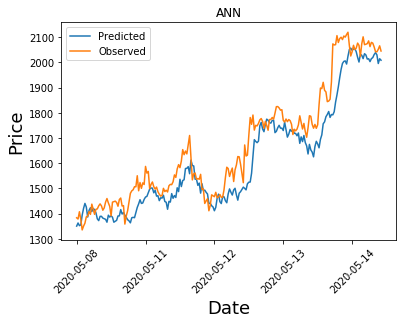

In [71]:
company_stock.basic_ann_model()

Recurrent neural network (RNN)
Epoch 1/10
1945/1945 [==============================] - 8s 4ms/step - loss: 0.0033
Epoch 2/10
1945/1945 [==============================] - 7s 4ms/step - loss: 2.7592e-04
Epoch 3/10
1945/1945 [==============================] - 7s 4ms/step - loss: 2.2034e-04
Epoch 4/10
1945/1945 [==============================] - 7s 4ms/step - loss: 1.6342e-04
Epoch 5/10
1945/1945 [==============================] - 8s 4ms/step - loss: 1.1875e-04
Epoch 6/10
1945/1945 [==============================] - 9s 5ms/step - loss: 1.0644e-04
Epoch 7/10
1945/1945 [==============================] - 8s 4ms/step - loss: 9.8665e-05
Epoch 8/10
1945/1945 [==============================] - 8s 4ms/step - loss: 8.6868e-05
Epoch 9/10
1945/1945 [==============================] - 8s 4ms/step - loss: 8.5148e-05
Epoch 10/10
1945/1945 [==============================] - 8s 4ms/step - loss: 7.9935e-05
R2 SCORE
0.9479293311303809
MSLE
0.0008600460534241869


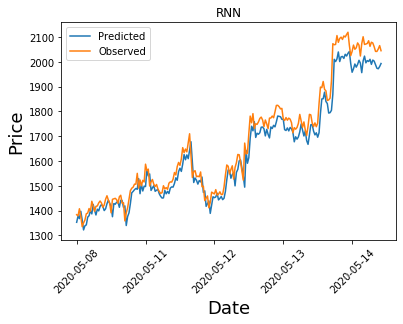

In [72]:
company_stock.rnn_model()

In [73]:
company_stock.best_model()

[['LSTM', 0.9274248049855155], ['Autoencoder', 0.8294797373003213], ['MLP', 0.953083812871098], ['ANN', 0.862240752243229], ['RNN', 0.9479293311303809]]
The best model is  MLP
Accuracy of  MLP is 0.953083812871098
